In [1]:
import os
import cv2  
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.regularizers import l2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

2024-04-17 17:12:35.013899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 17:12:35.435300: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 17:12:36.387350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/keanuf/anaconda3/envs/py310/lib/python3.10/site-packages/cv2/../../../../lib::/home/keanuf/anaconda3/envs/py310/lib/
2024-04-17 17:12:36.387493: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

#Keanu Francis

#Z#:23456741

#Due Date :4-07-2024

#Assignment #10

##Library imports
###Numpy
numpy will be used to store and extract individual columbs from the input numpy array
###Matplotlib
MAtplotlib will be used to plot the the information contained in the input data array

###Keras
This contains the mnist dataset as well as the  to_categorical funtionlaity

In [2]:
classes=[0,1]

In [3]:


# Define paths to your image directories
healthy_dir = "/home/keanuf/.cache/Assignemt9/healthyBrains"
sick_dir = "/home/keanuf/.cache/Assignemt9/sickBrains"


def load_images_from_dir(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for filename in files:
            img = cv2.imread(os.path.join(root, filename)) 
        
            img = cv2.resize(img, (64, 64))  
            images.append(img)
            labels.append(1 if "sick" in root else 0)  
    return images, labels

# Load images and labels from directories
healthy_images, y_healthy = load_images_from_dir(healthy_dir)
sick_images, y_sick = load_images_from_dir(sick_dir)

# Split data into train and test sets
X_train_healthy, X_test_healthy, y_train_healthy, y_test_healthy = train_test_split(
    healthy_images, y_healthy, test_size=0.2, random_state=42)

X_train_sick, X_test_sick, y_train_sick, y_test_sick = train_test_split(
    sick_images, y_sick, test_size=0.2, random_state=42)

# Concatenate the train and test sets for both classes
X_train = np.concatenate((X_train_healthy, X_train_sick), axis=0)
y_train = np.concatenate((y_train_healthy, y_train_sick), axis=0)

X_test = np.concatenate((X_test_healthy, X_test_sick), axis=0)
y_test = np.concatenate((y_test_healthy, y_test_sick), axis=0)

# Shuffle the data
shuffle_index_train = np.random.permutation(len(X_train))
shuffle_index_test = np.random.permutation(len(X_test))

X_train, y_train = X_train[shuffle_index_train], y_train[shuffle_index_train]
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]

# Now you have your train and test sets ready for your CNN




i. The network was built using 2 layer of 32 nodes

ii. The network was compiled with a learnring rate of 0.0001

iii. The nerwork was trained using saving the history in model, the validation data was also added to keep track of the validation loss.

In [4]:
num_train_img=X_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=X_train[train_ind_s, :, :,:]
y_train=y_train[train_ind_s]
x_val=x_train[0:int(0.2*num_train_img),:, :,:]
y_val=y_train[0:int(0.2*num_train_img)]

x_train=x_train[int(0.2*num_train_img):, :,:]
y_train=y_train[int(0.2*num_train_img):]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(23195, 64, 64, 3)
(23195,)
(5798, 64, 64, 3)
(5798,)



The training loss and validation loss were plotted as well as the accuracy



Evaluate was used to record the training loss and validaiton loss

#2 Layer 32Nodes


In [5]:
classes=[0,1]
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=X_test.astype('float32')

x_train/=255
x_val/=255
x_test/=255

y_train_c= to_categorical(y_train, len(classes))
y_val_c= to_categorical(y_val, len(classes))
y_test_c=to_categorical(y_test, len(classes))
print(x_train.shape)
print(y_train_c.shape)
print(x_val.shape)
print(y_val_c.shape)
print(y_test_c.shape)

(23195, 64, 64, 3)
(23195, 2)
(5798, 64, 64, 3)
(5798, 2)
(7250, 2)


#iv)
The training loss and validation loss were plotted as well as the accuracy

#v)

Evaluate was used to record the training loss and validaiton loss

#2 Layer 64 Nodes


#iv)
The training loss and validation loss were plotted as well as the accuracy

#v)

Evaluate was used to record the training loss and validaiton loss

#2 Layer 128 Nodes


In [6]:
x_train_f=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_val_f=np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]*x_train.shape[3]))
x_test_f=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_train.shape[3]))


in this test we can see that anu value nod group larger that 32 and 2 laywers iwll cause increaces to the validation loss this is a sign of overfitting there for model 1 or model 2 would be a better network.

In [7]:
model_a=Sequential()
model_a.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(64,64,3), use_bias=False))

model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))


model_a.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))


model_a.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))


model_a.add(Flatten())
model_a.add(Dense(units=512, activation='relu', kernel_regularizer=l2(0.001)))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes), activation="softmax"))
model_a.summary()

datagen= ImageDataGenerator(
rotation_range=10, 
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip= True

)
datagen.fit(x_train)
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

save_path='/home/keanuf/.cache/Assignemt9/'
callbacks_save=ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')




2024-04-17 17:13:05.144690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 17:13:05.182447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 17:13:05.182525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 17:13:05.183603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        864       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9216      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                      

In [8]:
def plot_data(train_acc, val_acc, train_loss, val_loss, name):
    epochs = np.arange(1, len(train_loss) + 1)  # Adjusting epochs to start from 1

    fig, axs = plt.subplots(2, figsize=(10, 8))  # Adjusted figsize
    fig.suptitle(name, fontsize=16, fontweight='bold')  # Title style

    # Plotting accuracy
    axs[0].plot(epochs, train_acc, label="Training Accuracy", color='blue', linestyle='-')
    axs[0].plot(epochs, val_acc, label="Validation Accuracy", color='green', linestyle='--')
    axs[0].set_ylabel('Accuracy', fontsize=14)
    axs[0].legend(loc='lower right', fontsize=12)  # Legend position and font size
    axs[0].grid(True)  # Adding grid lines

    # Plotting loss
    axs[1].plot(epochs, train_loss, label="Training Loss", color='red', linestyle='-')
    axs[1].plot(epochs, val_loss, label="Validation Loss", color='orange', linestyle='--')
    axs[1].set_ylabel('Loss', fontsize=14)
    axs[1].legend(loc='upper right', fontsize=12)  # Legend position and font size
    axs[1].grid(True)  # Adding grid lines

    # Common x-label for both subplots
    axs[1].set_xlabel('Epochs', fontsize=14)

    # Adjusting tick parameters
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

def review_model(history, Model_details, model):
    train_loss=[]
    val_loss=[]
    train_acc=[]
    val_acc=[]
    train_acc_curve = np.array(history.history['accuracy'])
    train_loss_curve = np.array(history.history['loss'])
    val_loss_curve = np.array(history.history['val_loss'])
    val_acc_curve = np.array(history.history['val_accuracy'])
    plot_data(train_acc_curve , val_acc_curve,train_loss_curve,val_loss_curve, Model_details)
    score= model.evaluate(x_test, y_test_c)
    train_loss.append(score[0])
    train_acc.append(score[1])
    print("Total Loss on the training Set: ",score[0])
    print("Total Accuracy on the training Set: ",score[1])
    score= model.evaluate(x_val,y_val_c)
    val_loss.append(score[0])
    val_acc.append(score[1])
    print("Total Loss on the validation Set: ",score[0])
    print("Total Accuracy on the Validation Set: ",score[1])

In [9]:
history= model_a.fit(datagen.flow(x_train,y_train_c, batch_size=1028),
                     steps_per_epoch=len(x_train)/1028, 
                     epochs=50, verbose=1, validation_data=(x_val, y_val_c), 
                     callbacks=[callbacks_save])

Epoch 1/50


2024-04-17 17:13:10.040061: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-04-17 17:13:11.649605: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 17:13:11.671734: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 17:13:11.671816: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-04-17 17:13:11.692680: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 17:13:11.692821: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-04-17 17:13:13.639970: I tensorflow/stream_executor/cuda/c

23/22 [==============================] - ETA: 0s - loss: 1.3614 - accuracy: 0.6219

2024-04-17 17:13:33.400496: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 284983296 exceeds 10% of free system memory.
2024-04-17 17:13:33.992713: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 284983296 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 35s 1s/step - loss: 1.3614 - accuracy: 0.6219 - val_loss: 1.0922 - val_accuracy: 0.6318
Epoch 2/50
23/22 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.6725

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 806ms/step - loss: 0.9079 - accuracy: 0.6725 - val_loss: 0.8907 - val_accuracy: 0.6285
Epoch 3/50
23/22 [==============================] - ETA: 0s - loss: 0.7744 - accuracy: 0.7052

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 827ms/step - loss: 0.7744 - accuracy: 0.7052 - val_loss: 0.8260 - val_accuracy: 0.6218
Epoch 4/50
23/22 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7279

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 814ms/step - loss: 0.6938 - accuracy: 0.7279 - val_loss: 0.7719 - val_accuracy: 0.6325
Epoch 5/50
23/22 [==============================] - ETA: 0s - loss: 0.6346 - accuracy: 0.7543

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 823ms/step - loss: 0.6346 - accuracy: 0.7543 - val_loss: 0.7464 - val_accuracy: 0.6835
Epoch 6/50
23/22 [==============================] - ETA: 0s - loss: 0.5880 - accuracy: 0.7668

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 822ms/step - loss: 0.5880 - accuracy: 0.7668 - val_loss: 0.7121 - val_accuracy: 0.7144
Epoch 7/50
22/22 [==============================] - 17s 750ms/step - loss: 0.5611 - accuracy: 0.7701 - val_loss: 0.7156 - val_accuracy: 0.7232
Epoch 8/50
23/22 [==============================] - ETA: 0s - loss: 0.5432 - accuracy: 0.7799

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 820ms/step - loss: 0.5432 - accuracy: 0.7799 - val_loss: 0.6847 - val_accuracy: 0.7592
Epoch 9/50
23/22 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7837

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 812ms/step - loss: 0.5226 - accuracy: 0.7837 - val_loss: 0.6522 - val_accuracy: 0.7639
Epoch 10/50
23/22 [==============================] - ETA: 0s - loss: 0.4829 - accuracy: 0.8028

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 18s 806ms/step - loss: 0.4829 - accuracy: 0.8028 - val_loss: 0.6386 - val_accuracy: 0.7525
Epoch 11/50
23/22 [==============================] - ETA: 0s - loss: 0.4608 - accuracy: 0.8107

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 814ms/step - loss: 0.4608 - accuracy: 0.8107 - val_loss: 0.6032 - val_accuracy: 0.7618
Epoch 12/50
23/22 [==============================] - ETA: 0s - loss: 0.4807 - accuracy: 0.7954

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 18s 809ms/step - loss: 0.4807 - accuracy: 0.7954 - val_loss: 0.5931 - val_accuracy: 0.7867
Epoch 13/50
22/22 [==============================] - 17s 756ms/step - loss: 0.4413 - accuracy: 0.8150 - val_loss: 0.5984 - val_accuracy: 0.7273
Epoch 14/50
23/22 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.8154

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 819ms/step - loss: 0.4291 - accuracy: 0.8154 - val_loss: 0.5877 - val_accuracy: 0.7184
Epoch 15/50
23/22 [==============================] - ETA: 0s - loss: 0.4328 - accuracy: 0.8163

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 811ms/step - loss: 0.4328 - accuracy: 0.8163 - val_loss: 0.5289 - val_accuracy: 0.8320
Epoch 16/50
23/22 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8138

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 18s 804ms/step - loss: 0.4309 - accuracy: 0.8138 - val_loss: 0.4725 - val_accuracy: 0.8236
Epoch 17/50
22/22 [==============================] - 17s 751ms/step - loss: 0.4106 - accuracy: 0.8226 - val_loss: 0.5136 - val_accuracy: 0.7673
Epoch 18/50
23/22 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8363

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 837ms/step - loss: 0.3807 - accuracy: 0.8363 - val_loss: 0.4409 - val_accuracy: 0.8344
Epoch 19/50
23/22 [==============================] - ETA: 0s - loss: 0.3761 - accuracy: 0.8369

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 817ms/step - loss: 0.3761 - accuracy: 0.8369 - val_loss: 0.4256 - val_accuracy: 0.8412
Epoch 20/50
23/22 [==============================] - ETA: 0s - loss: 0.3611 - accuracy: 0.8459

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 815ms/step - loss: 0.3611 - accuracy: 0.8459 - val_loss: 0.4025 - val_accuracy: 0.8448
Epoch 21/50
22/22 [==============================] - 17s 763ms/step - loss: 0.3822 - accuracy: 0.8360 - val_loss: 0.4033 - val_accuracy: 0.8396
Epoch 22/50
22/22 [==============================] - 17s 760ms/step - loss: 0.3760 - accuracy: 0.8409 - val_loss: 0.4059 - val_accuracy: 0.8420
Epoch 23/50
23/22 [==============================] - ETA: 0s - loss: 0.3699 - accuracy: 0.8430

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 817ms/step - loss: 0.3699 - accuracy: 0.8430 - val_loss: 0.3822 - val_accuracy: 0.8493
Epoch 24/50
22/22 [==============================] - 17s 756ms/step - loss: 0.3558 - accuracy: 0.8457 - val_loss: 0.3867 - val_accuracy: 0.8382
Epoch 25/50
23/22 [==============================] - ETA: 0s - loss: 0.3378 - accuracy: 0.8573

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 18s 811ms/step - loss: 0.3378 - accuracy: 0.8573 - val_loss: 0.3614 - val_accuracy: 0.8353
Epoch 26/50
22/22 [==============================] - 17s 756ms/step - loss: 0.3337 - accuracy: 0.8560 - val_loss: 0.3709 - val_accuracy: 0.8339
Epoch 27/50
23/22 [==============================] - ETA: 0s - loss: 0.3246 - accuracy: 0.8615

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 806ms/step - loss: 0.3246 - accuracy: 0.8615 - val_loss: 0.3448 - val_accuracy: 0.8522
Epoch 28/50
23/22 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.8618

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 816ms/step - loss: 0.3222 - accuracy: 0.8618 - val_loss: 0.3315 - val_accuracy: 0.8499
Epoch 29/50
22/22 [==============================] - 17s 752ms/step - loss: 0.3343 - accuracy: 0.8548 - val_loss: 0.3997 - val_accuracy: 0.8079
Epoch 30/50
22/22 [==============================] - 17s 769ms/step - loss: 0.3405 - accuracy: 0.8520 - val_loss: 0.3708 - val_accuracy: 0.8415
Epoch 31/50
22/22 [==============================] - 17s 767ms/step - loss: 0.3175 - accuracy: 0.8651 - val_loss: 0.3438 - val_accuracy: 0.8451
Epoch 32/50
22/22 [==============================] - 18s 769ms/step - loss: 0.3136 - accuracy: 0.8665 - val_loss: 0.5069 - val_accuracy: 0.7915
Epoch 33/50
22/22 [==============================] - 17s 760ms/step - loss: 0.3169 - accuracy: 0.8647 - val_loss: 0.3403 - val_accuracy: 0.8562
Epoch 34/50
22/22 [==============================] - 17s 766ms/step - loss: 0.3392 - accuracy: 0.8599 - val_loss: 0.3510 - val_accuracy: 0.8522
Epoc

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 836ms/step - loss: 0.2886 - accuracy: 0.8794 - val_loss: 0.3183 - val_accuracy: 0.8655
Epoch 38/50
22/22 [==============================] - 17s 754ms/step - loss: 0.2815 - accuracy: 0.8822 - val_loss: 0.3378 - val_accuracy: 0.8563
Epoch 39/50
22/22 [==============================] - 17s 763ms/step - loss: 0.2763 - accuracy: 0.8839 - val_loss: 0.3382 - val_accuracy: 0.8584
Epoch 40/50
22/22 [==============================] - 18s 768ms/step - loss: 0.2776 - accuracy: 0.8840 - val_loss: 0.3855 - val_accuracy: 0.8353
Epoch 41/50
22/22 [==============================] - 18s 803ms/step - loss: 0.2832 - accuracy: 0.8836 - val_loss: 0.3841 - val_accuracy: 0.8374
Epoch 42/50
23/22 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8847

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 20s 882ms/step - loss: 0.2776 - accuracy: 0.8847 - val_loss: 0.3001 - val_accuracy: 0.8753
Epoch 43/50
22/22 [==============================] - 18s 770ms/step - loss: 0.3097 - accuracy: 0.8740 - val_loss: 0.4167 - val_accuracy: 0.8236
Epoch 44/50
22/22 [==============================] - 18s 766ms/step - loss: 0.2812 - accuracy: 0.8841 - val_loss: 0.4401 - val_accuracy: 0.8248
Epoch 45/50
22/22 [==============================] - 17s 753ms/step - loss: 0.2738 - accuracy: 0.8873 - val_loss: 0.3325 - val_accuracy: 0.8612
Epoch 46/50
23/22 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.8947

INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


INFO:tensorflow:Assets written to: /home/keanuf/.cache/Assignemt9/assets


22/22 [==============================] - 19s 817ms/step - loss: 0.2574 - accuracy: 0.8947 - val_loss: 0.2917 - val_accuracy: 0.8782
Epoch 47/50
22/22 [==============================] - 17s 764ms/step - loss: 0.2684 - accuracy: 0.8907 - val_loss: 0.3808 - val_accuracy: 0.8499
Epoch 48/50
22/22 [==============================] - 17s 763ms/step - loss: 0.2657 - accuracy: 0.8912 - val_loss: 0.4583 - val_accuracy: 0.8144
Epoch 49/50
22/22 [==============================] - 17s 763ms/step - loss: 0.2720 - accuracy: 0.8886 - val_loss: 0.2990 - val_accuracy: 0.8788
Epoch 50/50
22/22 [==============================] - 17s 760ms/step - loss: 0.2590 - accuracy: 0.8941 - val_loss: 0.3846 - val_accuracy: 0.8574


In [3]:


y_pred = model_a.predict(x_train)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_train, y_pred_classes)
model_a.save('/home/keanuf/.cache/Assignemt9/brainmodel.h5')
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'model_a' is not defined

In [2]:
model_a.save('/home/keanuf/.cache/Assignemt9')

NameError: name 'model_a' is not defined

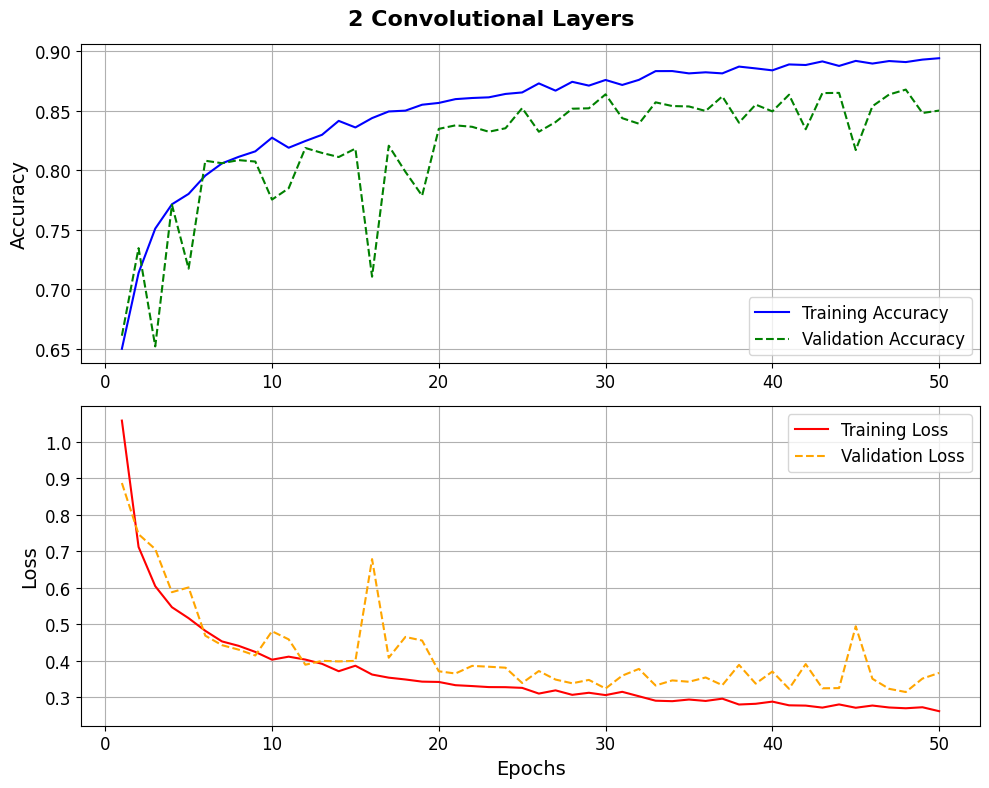

227/227 [==============================] - 2s 7ms/step - loss: 0.3632 - accuracy: 0.8530
Total Loss on the training Set:  0.3632465898990631
Total Accuracy on the training Set:  0.8529655337333679
182/182 [==============================] - 1s 6ms/step - loss: 0.3662 - accuracy: 0.8499
Total Loss on the validation Set:  0.36621570587158203
Total Accuracy on the Validation Set:  0.8499482870101929


In [ ]:
review_model(history, "2 Convolutional Layers ", model_a)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.linear_model import LogisticRegression
model = load_model('/home/keanuf/.cache/Assignemt9/brainmodel.h5')
img_path = '/home/keanuf/.cache/461670_45.png' 

img = image.load_img(img_path, target_size=(32, 32))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array = img_array / 255.0 
predictions = model.predict(img_array)

# Interpret the results
if predictions[0][0] > 0.5:
    print("The model predicts: Sick",predictions[0][0]  )
else:
    print("The model predicts: Healthy",predictions[0][0] )



1/1 [==============================] - 0s 60ms/step
The model predicts: Sick 0.99452543
